# Gradio Pets

In [ ]:
#use the master branch

In [ ]:
pip install git+https://github.com/rwightman/pytorch-image-models.git

In [14]:
from fastai.vision.all import *


In [30]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.', 
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

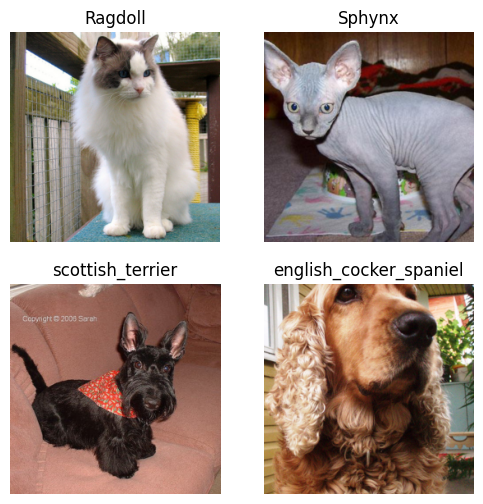

In [28]:
dls.show_batch(max_n=4)

In [5]:
learn = vision_learner(
        dls, 
        resnet34,
        metrics=error_rate)
learn.fine_tune(3)

/home/tonystark/mambaforge/envs/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tonystark/mambaforge/envs/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.451659,0.321222,0.096076,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.433642,0.317626,0.104871,00:33
1,0.264376,0.229359,0.073072,00:33
2,0.125304,0.200330,0.069689,00:33


In [ ]:
timm.list_models('convnext*')

In [33]:
learn = vision_learner(
    dls, 
    'convnext_tiny', 
    metrics=error_rate).to_fp16()
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,5.293317,4.022298,0.969553,00:27


epoch,train_loss,valid_loss,error_rate,time
0,4.977655,3.897598,0.961434,00:30
1,4.760197,3.710543,0.945196,00:30
2,4.595493,3.657003,0.937754,00:31


In [34]:
learn.export('model.pkl')

In [ ]:
timm.list_models('levit*')

In [32]:
learn = vision_learner(
    dls, 
    'levit_conv_128s', 
    metrics=error_rate).to_fp16()

learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,5.281461,4.497921,0.972936,00:25


epoch,train_loss,valid_loss,error_rate,time
0,5.153282,4.627619,0.968877,00:25
1,5.027957,4.489978,0.964817,00:25
2,4.917796,4.443544,0.967524,00:25
